<a href="https://colab.research.google.com/github/bharath3579/TVS_GRID_6.0_CDFA/blob/main/TVS_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importing needed files

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
# SimpleImputer is now imported from sklearn.impute
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor  # For feature importance

# Step 1: Load the dataset


In [ ]:
# Step 1: Load the dataset
df = pd.read_csv("cdfc_data.csv")
print("Initial Data Preview:\n", df.head())

Initial Data Preview:
     DISBMONTH  LOAN_NUMBER CD_SEGMENT PRODUCT_CODE ETC_NTC PAYMENT_TYPE  \
0  10-31-2022            1     MOBILE       MOBILE     NTC          ADM   
1  11-30-2022            2     MOBILE       MOBILE     ETC          ADM   
2  10-31-2022            3     MOBILE       MOBILE     ETC         ENCH   
3  10-31-2022            4     MOBILE       MOBILE     ETC          ADM   
4  10-31-2022            5     MOBILE       MOBILE     ETC          ADM   

   CUST_PINCODE CUST_STATE MANUFACTURE_CODE  TENUR  ...  TOTAL_NO_ENQ  \
0      517551.0         AP             OPPO    7.0  ...             0   
1      517002.0         AP          SAMSUNG    6.0  ...             4   
2      517132.0         AP             OPPO    8.0  ...             0   
3      517130.0         AP             OPPO    7.0  ...             2   
4      515212.0         AP             OPPO    7.0  ...             8   

   TOTAL_NO_ENQ_LAST_3M  TOTAL_NO_ENQ_CD  TOTAL_NO_ENQ_CD_LAST_3M  \
0                 

# Step 2: Handle datetime features

In [ ]:

df['DISBMONTH'] = pd.to_datetime(df['DISBMONTH'], errors='coerce')
print("\nConverted DISBMONTH to datetime:\n", df['DISBMONTH'].head())



Converted DISBMONTH to datetime:
 0   2022-10-31
1   2022-11-30
2   2022-10-31
3   2022-10-31
4   2022-10-31
Name: DISBMONTH, dtype: datetime64[ns]


# Step 3: Handle missing values in numerical columns

In [ ]:

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())
print("\nMissing values after filling numerical columns:\n", df.isnull().sum())



Missing values after filling numerical columns:
 DISBMONTH                            0
LOAN_NUMBER                          0
CD_SEGMENT                           0
PRODUCT_CODE                         2
ETC_NTC                              0
PAYMENT_TYPE                         2
CUST_PINCODE                         0
CUST_STATE                           0
MANUFACTURE_CODE                     2
TENUR                                0
ADVANCE_EMI_COUNT                    0
EMI                                  0
LTV                                  0
ASSET_COST                           0
ACTUAL_LOAN_AMOUNT                   0
DOWN_PAYMENT                         0
PAYNIMO_STATUS                   79978
QUALIFICATION                     2983
GENDER                               2
MARITALSTATUS                        2
CUST_AGE                             0
EMP_GRP                              0
MATCH_SCORE                          0
TOTAL_NO_LV_TRADELINES               0
BUREAU_VINTAGE

# Step 4: Exploratory Data Analysis (EDA)

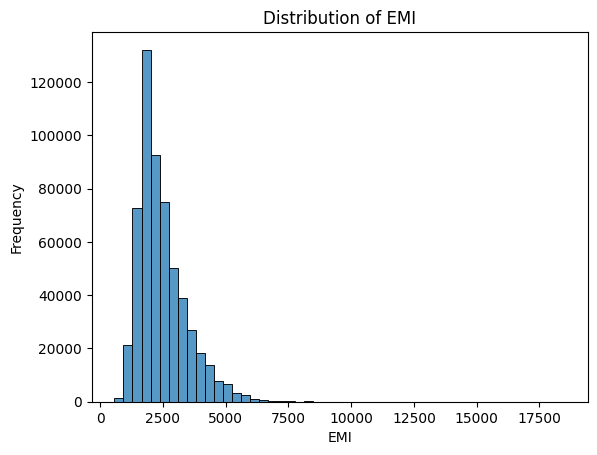

In [ ]:
# Visualize the distribution of the 'EMI' column
sns.histplot(df['EMI'], bins=50)
plt.title('Distribution of EMI')
plt.xlabel('EMI')
plt.ylabel('Frequency')
plt.show()

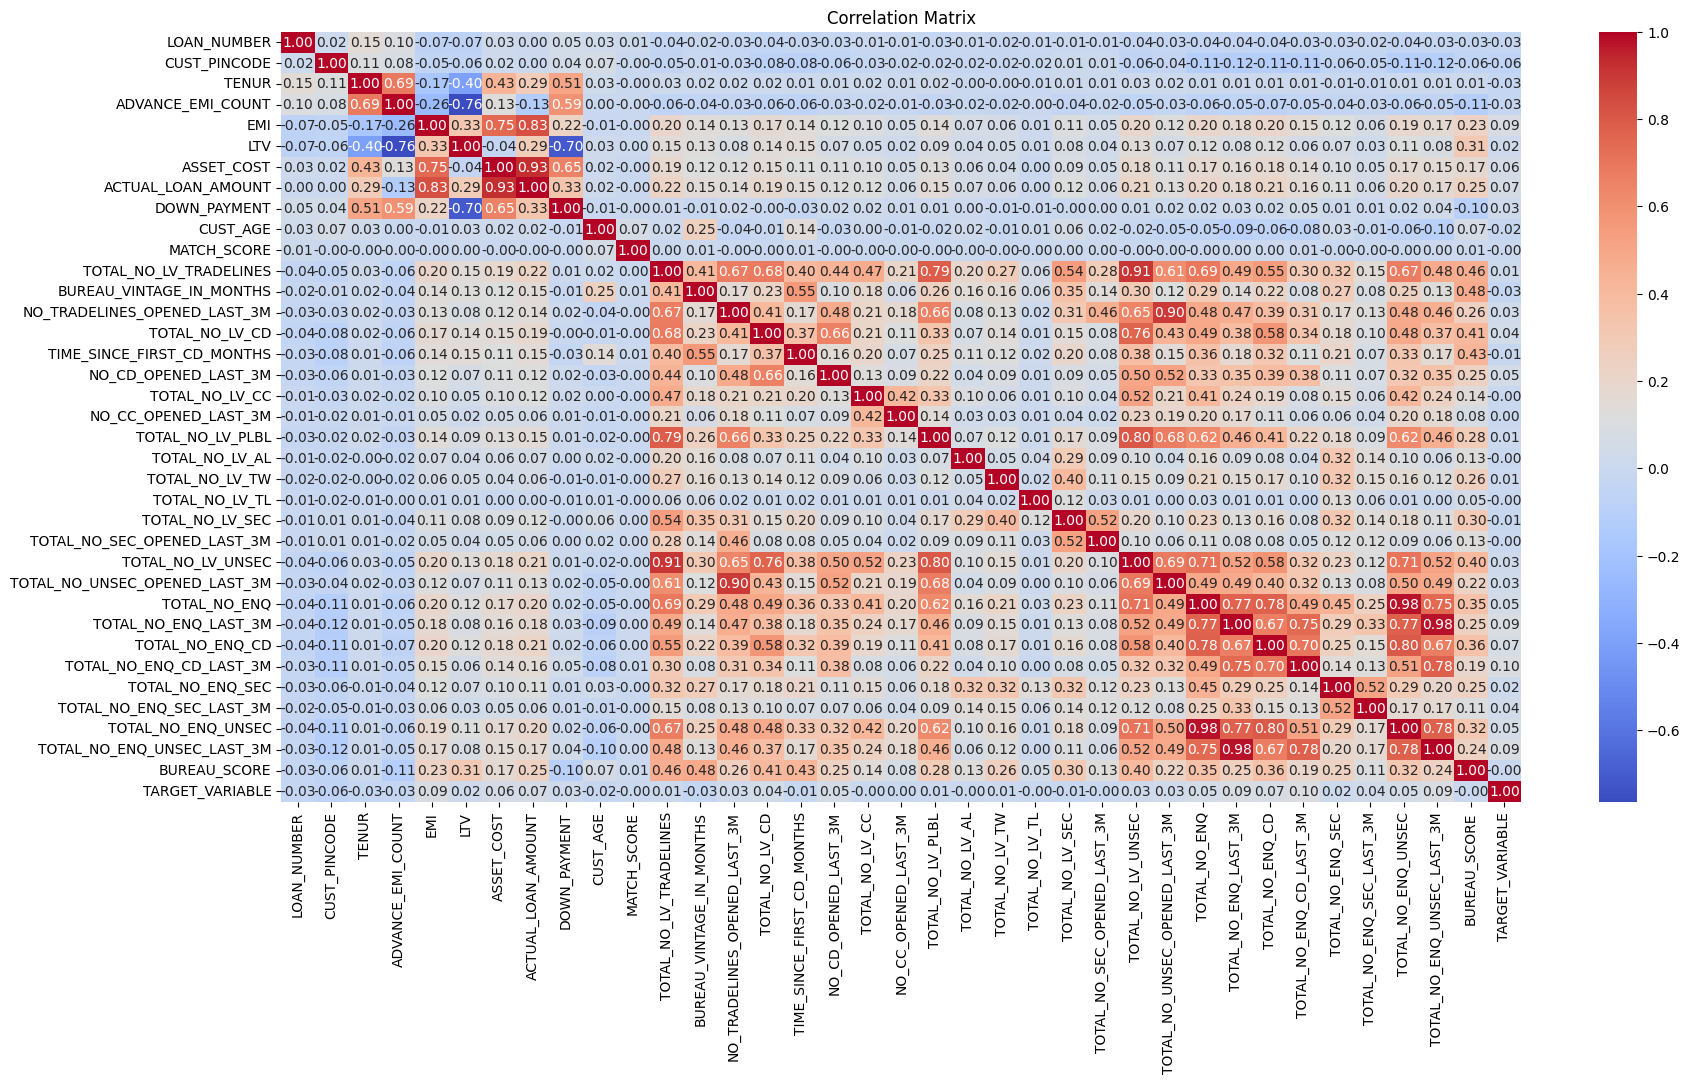

In [ ]:
# Compute and plot the correlation matrix
numerical_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numerical_df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile of Indian states
india_map = gpd.read_file('india_st.shp')

# Inspect the first few rows and column names of the GeoDataFrame
print(india_map.head())
print(india_map.columns)


                         STATE  \
0  ANDAMAN AND NICOBAR ISLANDS   
1               ANDHRA PRADESH   
2            ARUNACHAL PRADESH   
3                        ASSAM   
4                        BIHAR   

                                            geometry  
0  MULTIPOLYGON (((94.08923 6.73365, 93.97717 6.9...  
1  POLYGON ((82.00063 17.95354, 82.11718 18.02457...  
2  POLYGON ((95.61476 27.34745, 95.69234 27.33888...  
3  POLYGON ((92.82207 25.57781, 92.69672 25.61368...  
4  POLYGON ((84.16946 26.28322, 83.91399 26.38523...  
Index(['STATE', 'geometry'], dtype='object')


Sample data in df:
       CUST_STATE full_state_name
0              AP  Andhra Pradesh
46020          AS           Assam
50329          BH           Bihar
75959          CH      Chandigarh
75967          CT    Chhattisgarh
93157          DL           Delhi
101179         GA             Goa
104191         GJ         Gujarat
121915         HR         Haryana
139466         JH       Jharkhand
162648         KA       Karnataka
205112         KL          Kerala
220333         MH     Maharashtra
268121         MP  Madhya Pradesh
288686         OR          Odisha
311547         PB          Punjab
314000         PY      Puducherry
336837         RJ       Rajasthan
356169         TN      Tamil Nadu
418765         TS       Telangana
448912         UK     Uttarakhand
452747         UP   Uttar Pradesh
499319         WB     West Bengal
Sample data in india_map:
                         STATE
0  ANDAMAN AND NICOBAR ISLANDS
1               ANDHRA PRADESH
2            ARUNACHAL PRADESH
3              

<Figure size 1400x1000 with 0 Axes>

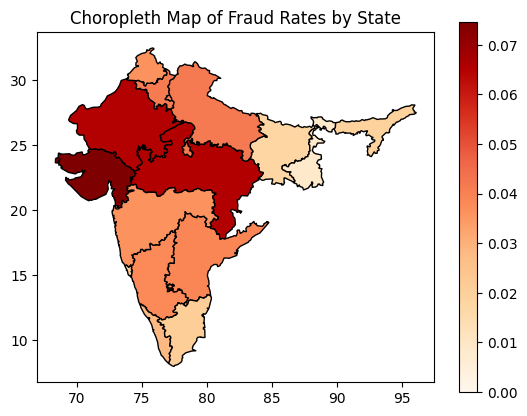

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Mapping of state abbreviations to full names
state_mapping = {
    'AP': 'Andhra Pradesh', 'AS': 'Assam', 'BH': 'Bihar', 'CH': 'Chandigarh',
    'CT': 'Chhattisgarh', 'DL': 'Delhi', 'GA': 'Goa', 'GJ': 'Gujarat',
    'HR': 'Haryana', 'JH': 'Jharkhand', 'KA': 'Karnataka', 'KL': 'Kerala',
    'MH': 'Maharashtra', 'MP': 'Madhya Pradesh', 'OR': 'Odisha', 'PB': 'Punjab',
    'PY': 'Puducherry', 'RJ': 'Rajasthan', 'TN': 'Tamil Nadu', 'TS': 'Telangana',
    'UK': 'Uttarakhand', 'UP': 'Uttar Pradesh', 'WB': 'West Bengal'
}

# Add full state names to df
df['full_state_name'] = df['CUST_STATE'].map(state_mapping)

# Print sample data
print("Sample data in df:")
print(df[['CUST_STATE', 'full_state_name']].drop_duplicates())

# Load the shapefile of Indian states
india_map = gpd.read_file('india_st.shp')

# Normalize state names to match the `STATE` column format
df['full_state_name'] = df['full_state_name'].str.upper().str.strip()
india_map['STATE'] = india_map['STATE'].str.upper().str.strip()

# Print sample data in india_map
print("Sample data in india_map:")
print(india_map[['STATE']].head())

# Aggregate fraud data by state
fraud_by_state = df.groupby('full_state_name')['TARGET_VARIABLE'].mean().reset_index()

# Print sample aggregated fraud data
print("Sample aggregated fraud data:")
print(fraud_by_state.head())

# Merge the fraud data with the map data
india_fraud_map = india_map.merge(fraud_by_state, left_on='STATE', right_on='full_state_name', how='left')

# Print the merged GeoDataFrame
print("Sample merged GeoDataFrame:")
print(india_fraud_map.head())

# Plotting the choropleth map
plt.figure(figsize=(14, 10))
india_fraud_map.plot(column='TARGET_VARIABLE', cmap='OrRd', legend=True, edgecolor='black')
plt.title('Choropleth Map of Fraud Rates by State')
plt.show()


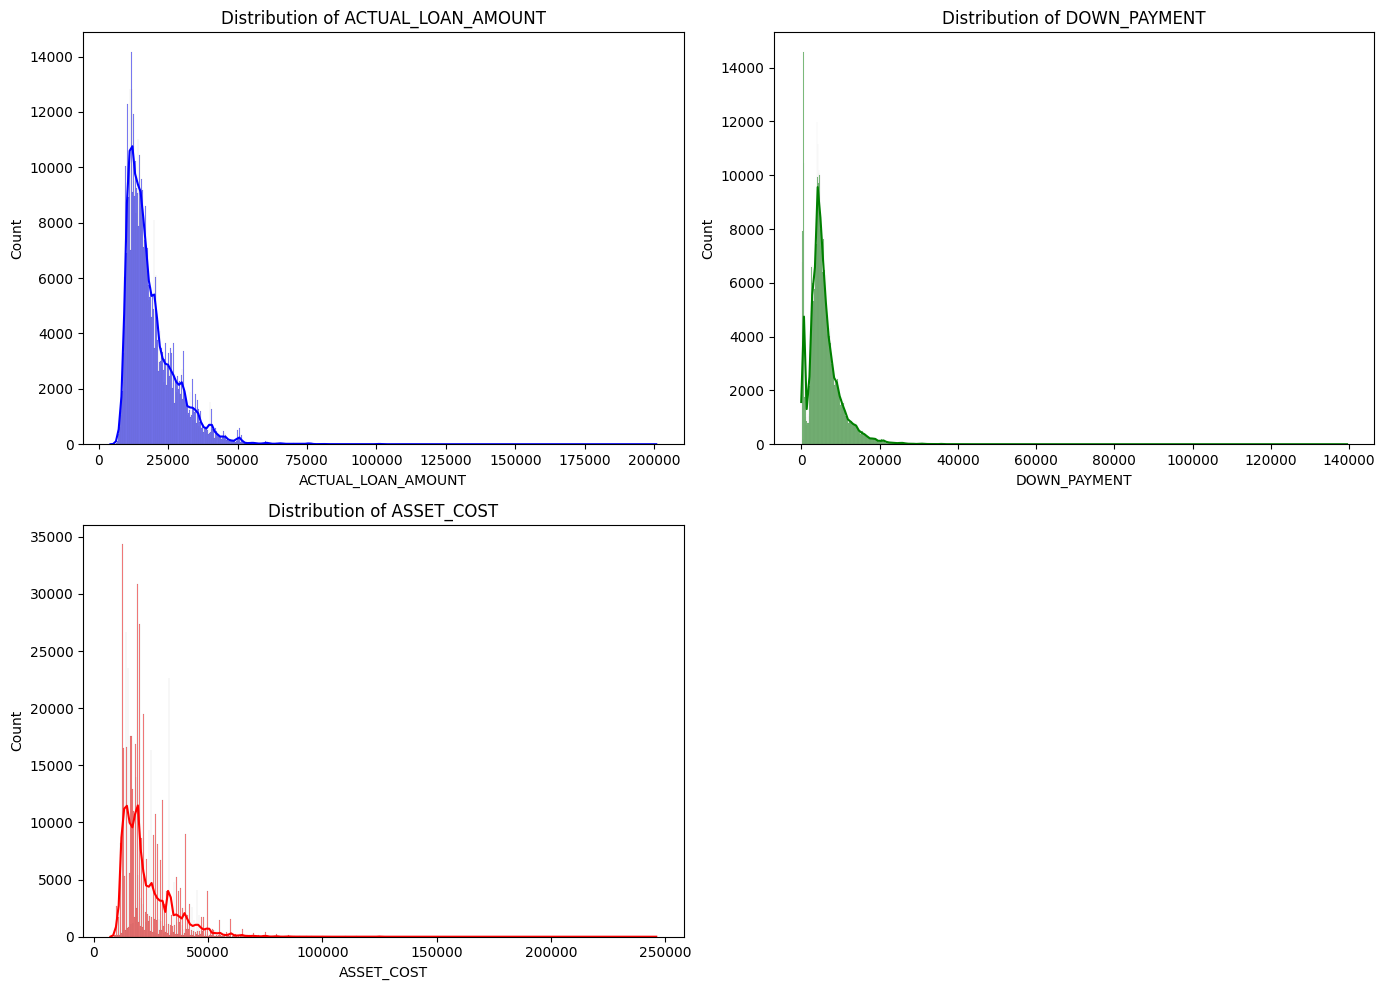

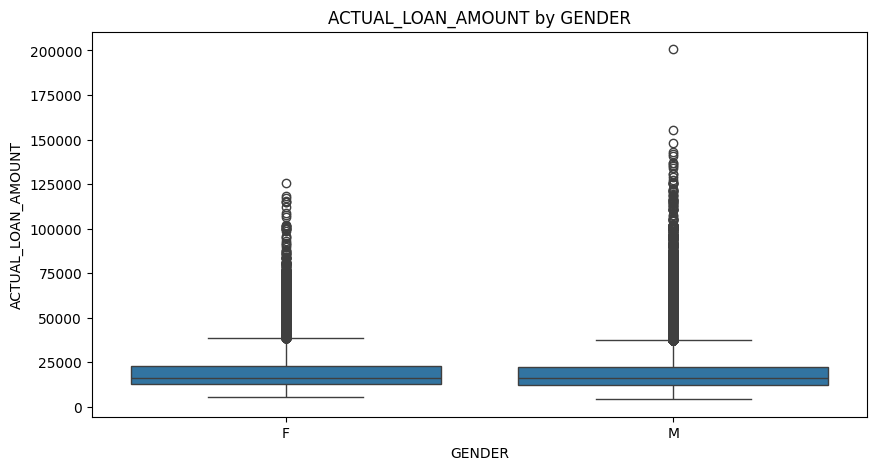

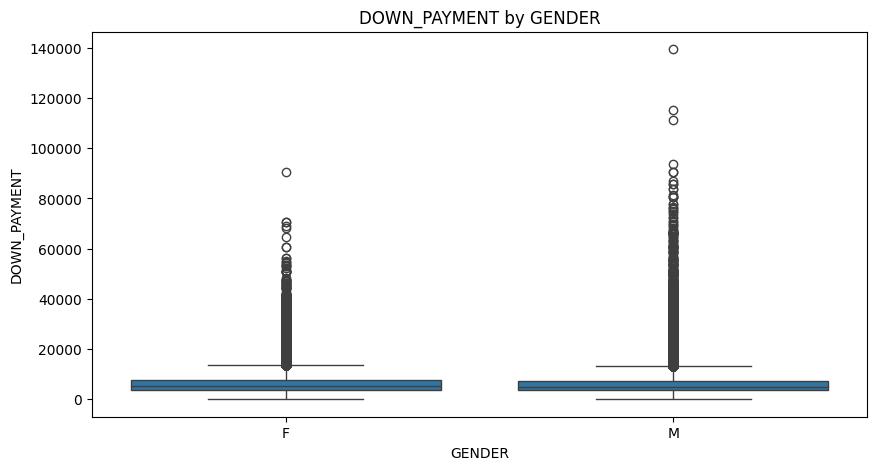

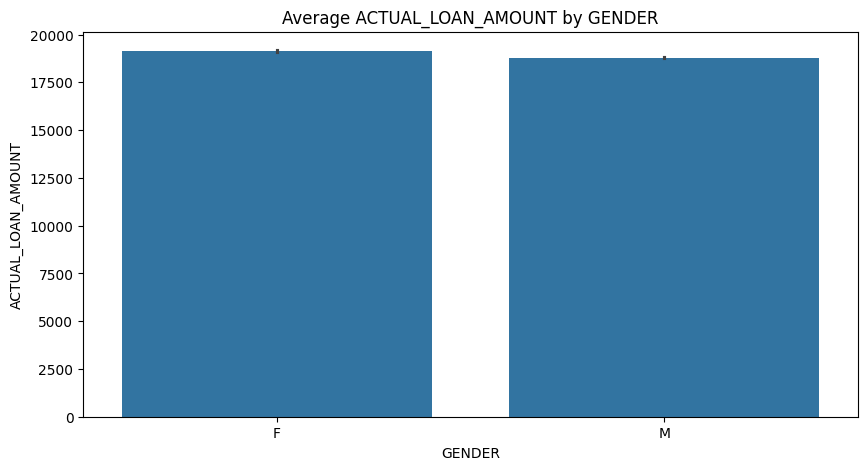

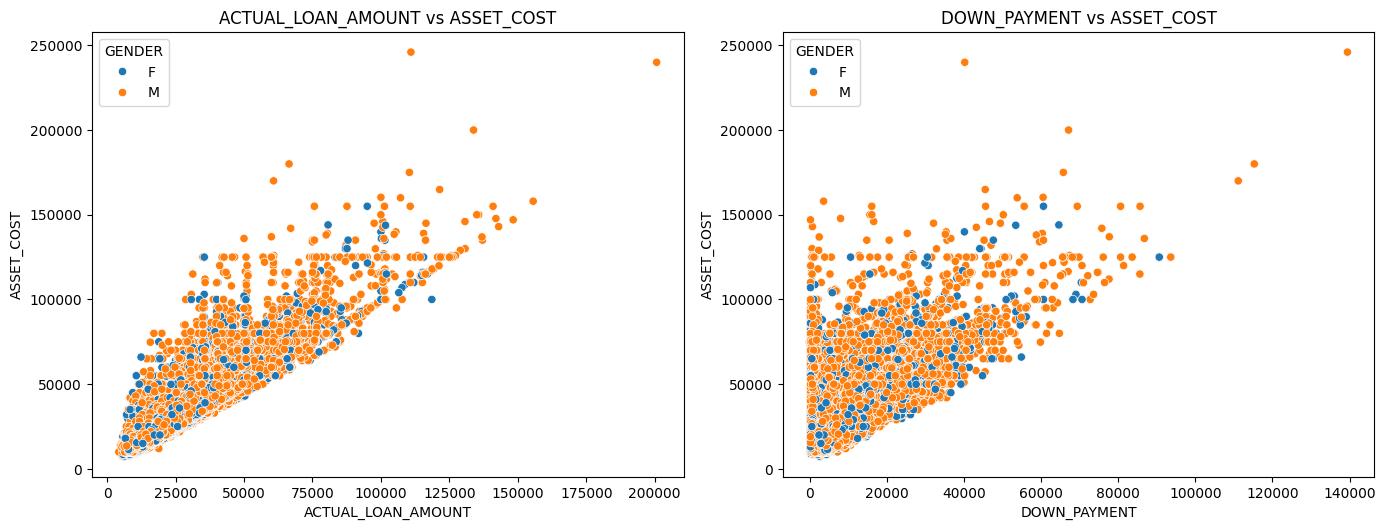

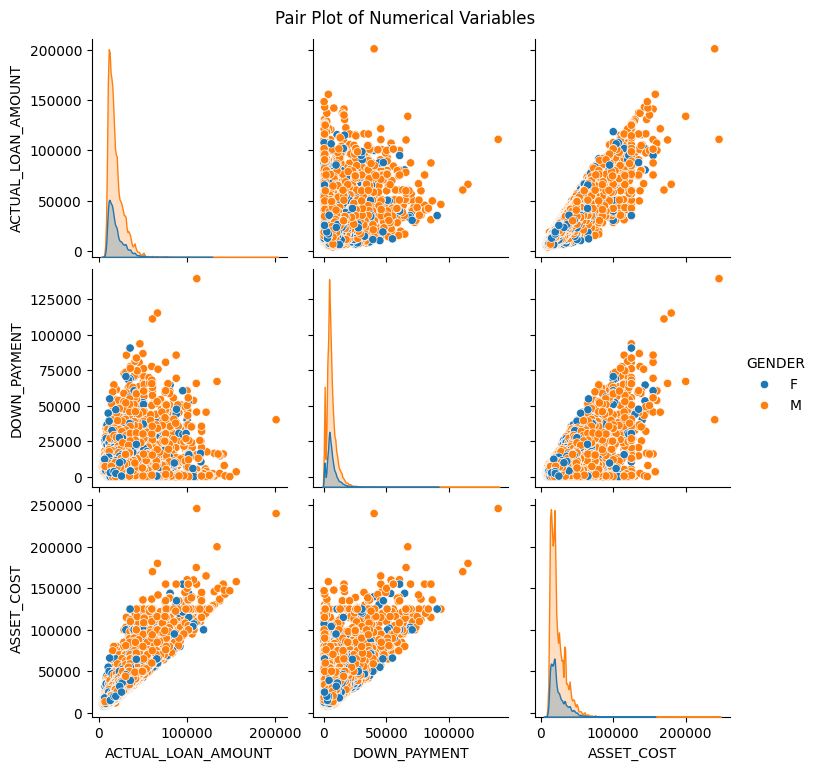

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical variables
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
sns.histplot(df['ACTUAL_LOAN_AMOUNT'], kde=True, color='blue')
plt.title('Distribution of ACTUAL_LOAN_AMOUNT')

plt.subplot(2, 2, 2)
sns.histplot(df['DOWN_PAYMENT'], kde=True, color='green')
plt.title('Distribution of DOWN_PAYMENT')

plt.subplot(2, 2, 3)
sns.histplot(df['ASSET_COST'], kde=True, color='red')
plt.title('Distribution of ASSET_COST')

plt.tight_layout()
plt.show()



plt.figure(figsize=(10, 5))
sns.boxplot(x='GENDER', y='ACTUAL_LOAN_AMOUNT', data=df)
plt.title('ACTUAL_LOAN_AMOUNT by GENDER')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='GENDER', y='DOWN_PAYMENT', data=df)
plt.title('DOWN_PAYMENT by GENDER')
plt.show()


plt.figure(figsize=(10, 5))
sns.barplot(x='GENDER', y='ACTUAL_LOAN_AMOUNT', data=df, estimator='mean')
plt.title('Average ACTUAL_LOAN_AMOUNT by GENDER')
plt.show()

# Scatter plots
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
sns.scatterplot(x='ACTUAL_LOAN_AMOUNT', y='ASSET_COST', hue='GENDER', data=df)
plt.title('ACTUAL_LOAN_AMOUNT vs ASSET_COST')

plt.subplot(2, 2, 2)
sns.scatterplot(x='DOWN_PAYMENT', y='ASSET_COST', hue='GENDER', data=df)
plt.title('DOWN_PAYMENT vs ASSET_COST')

plt.tight_layout()
plt.show()

# Pair plots
sns.pairplot(df, hue='GENDER', vars=['ACTUAL_LOAN_AMOUNT', 'DOWN_PAYMENT', 'ASSET_COST'])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

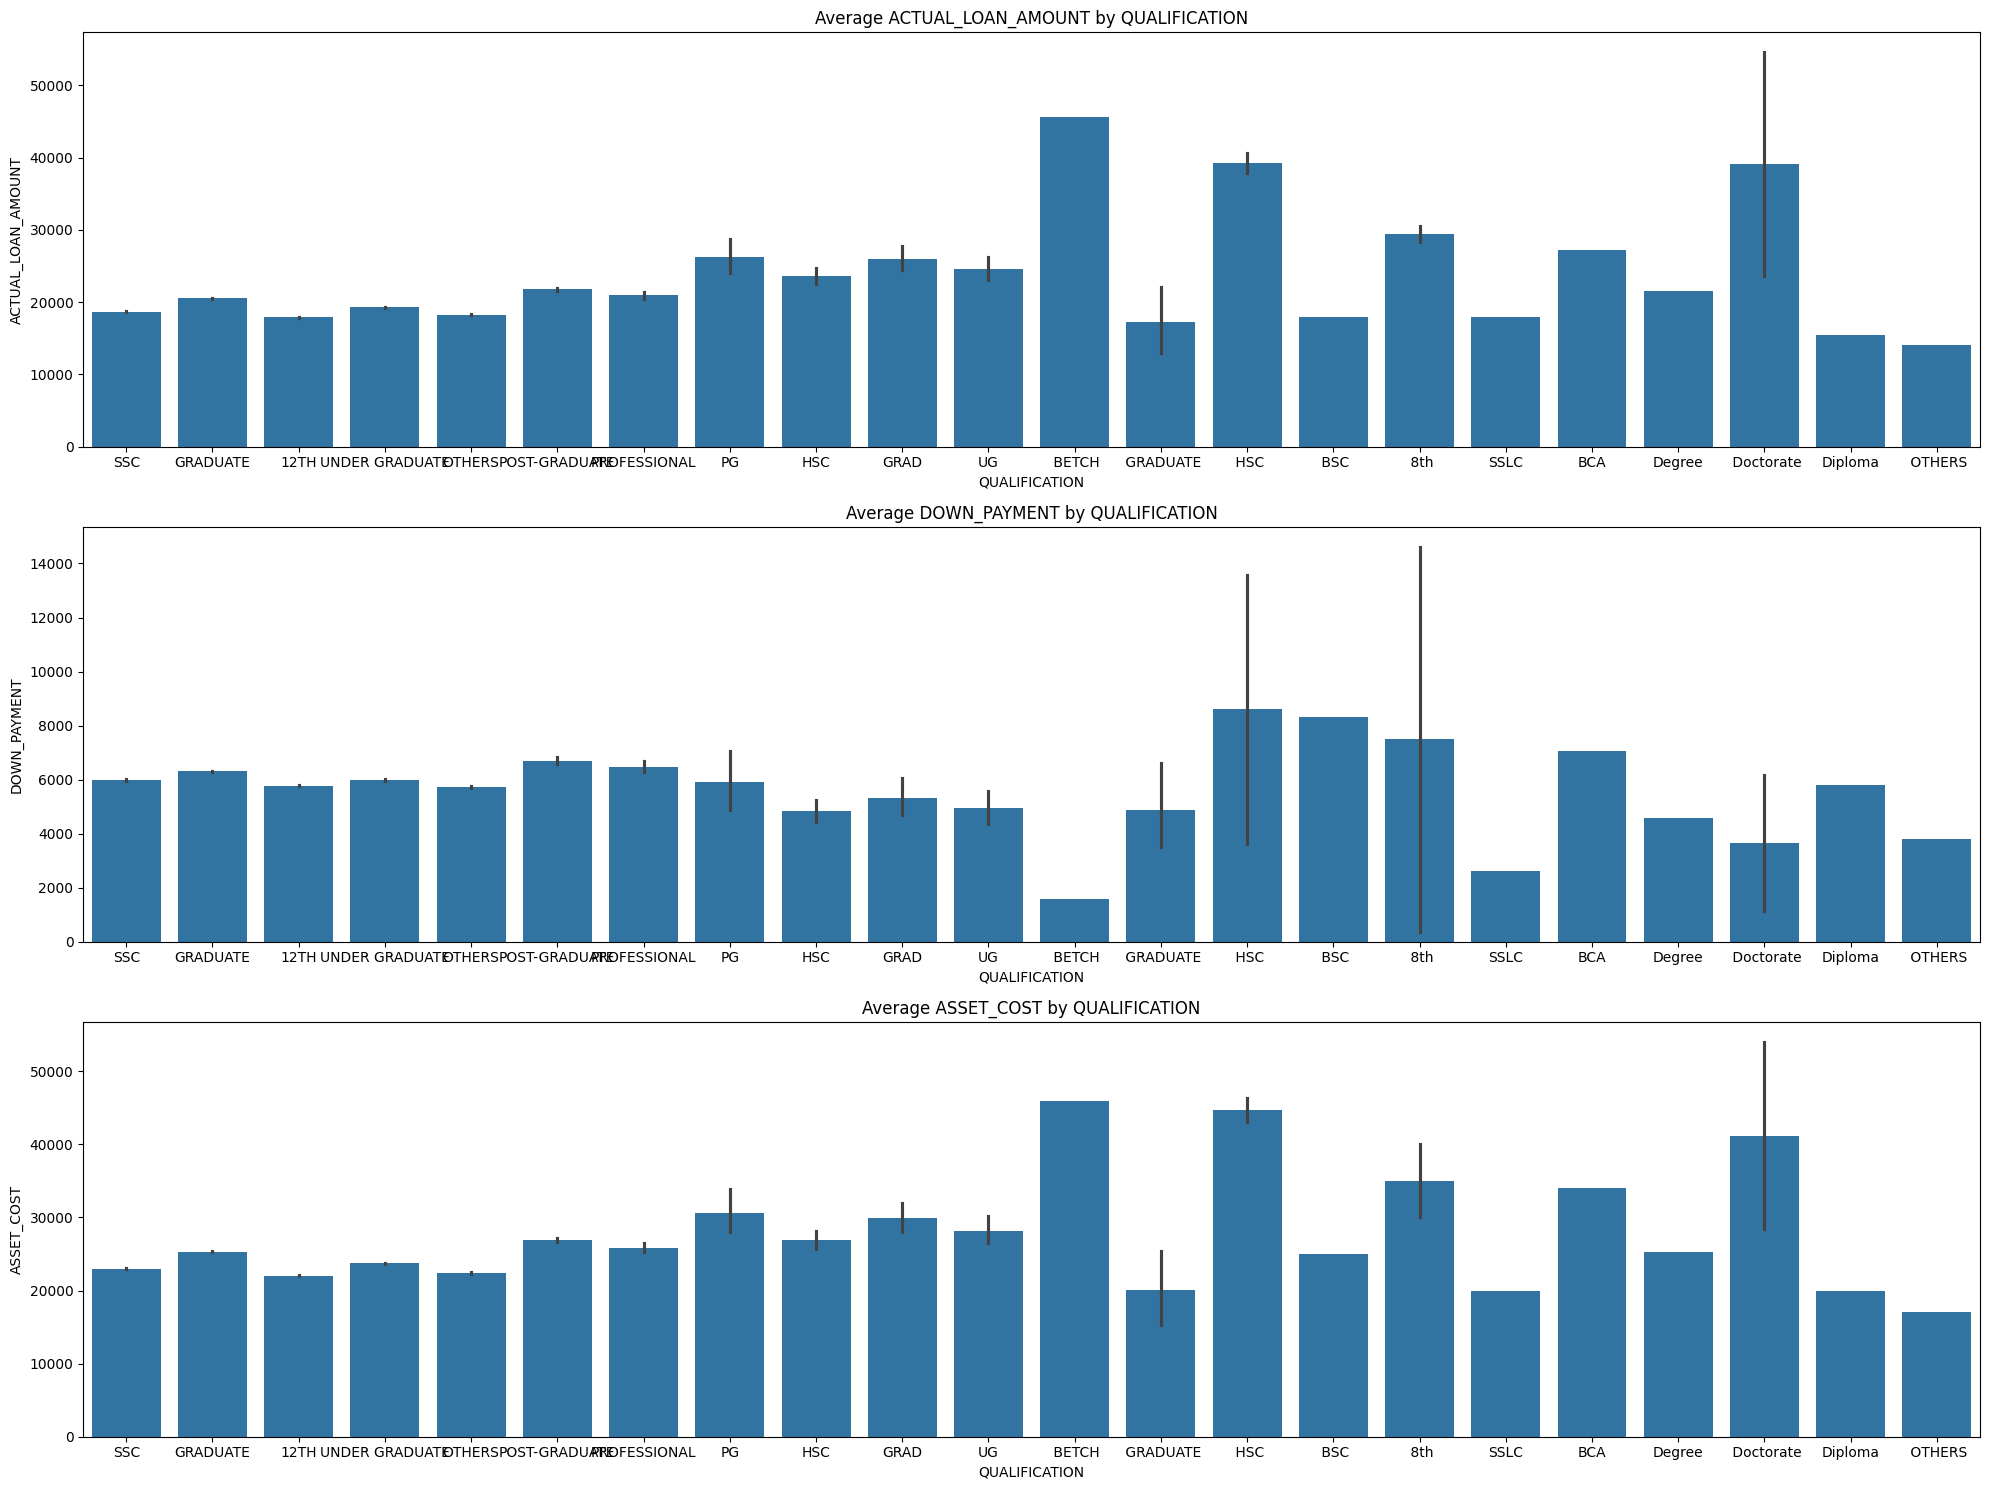

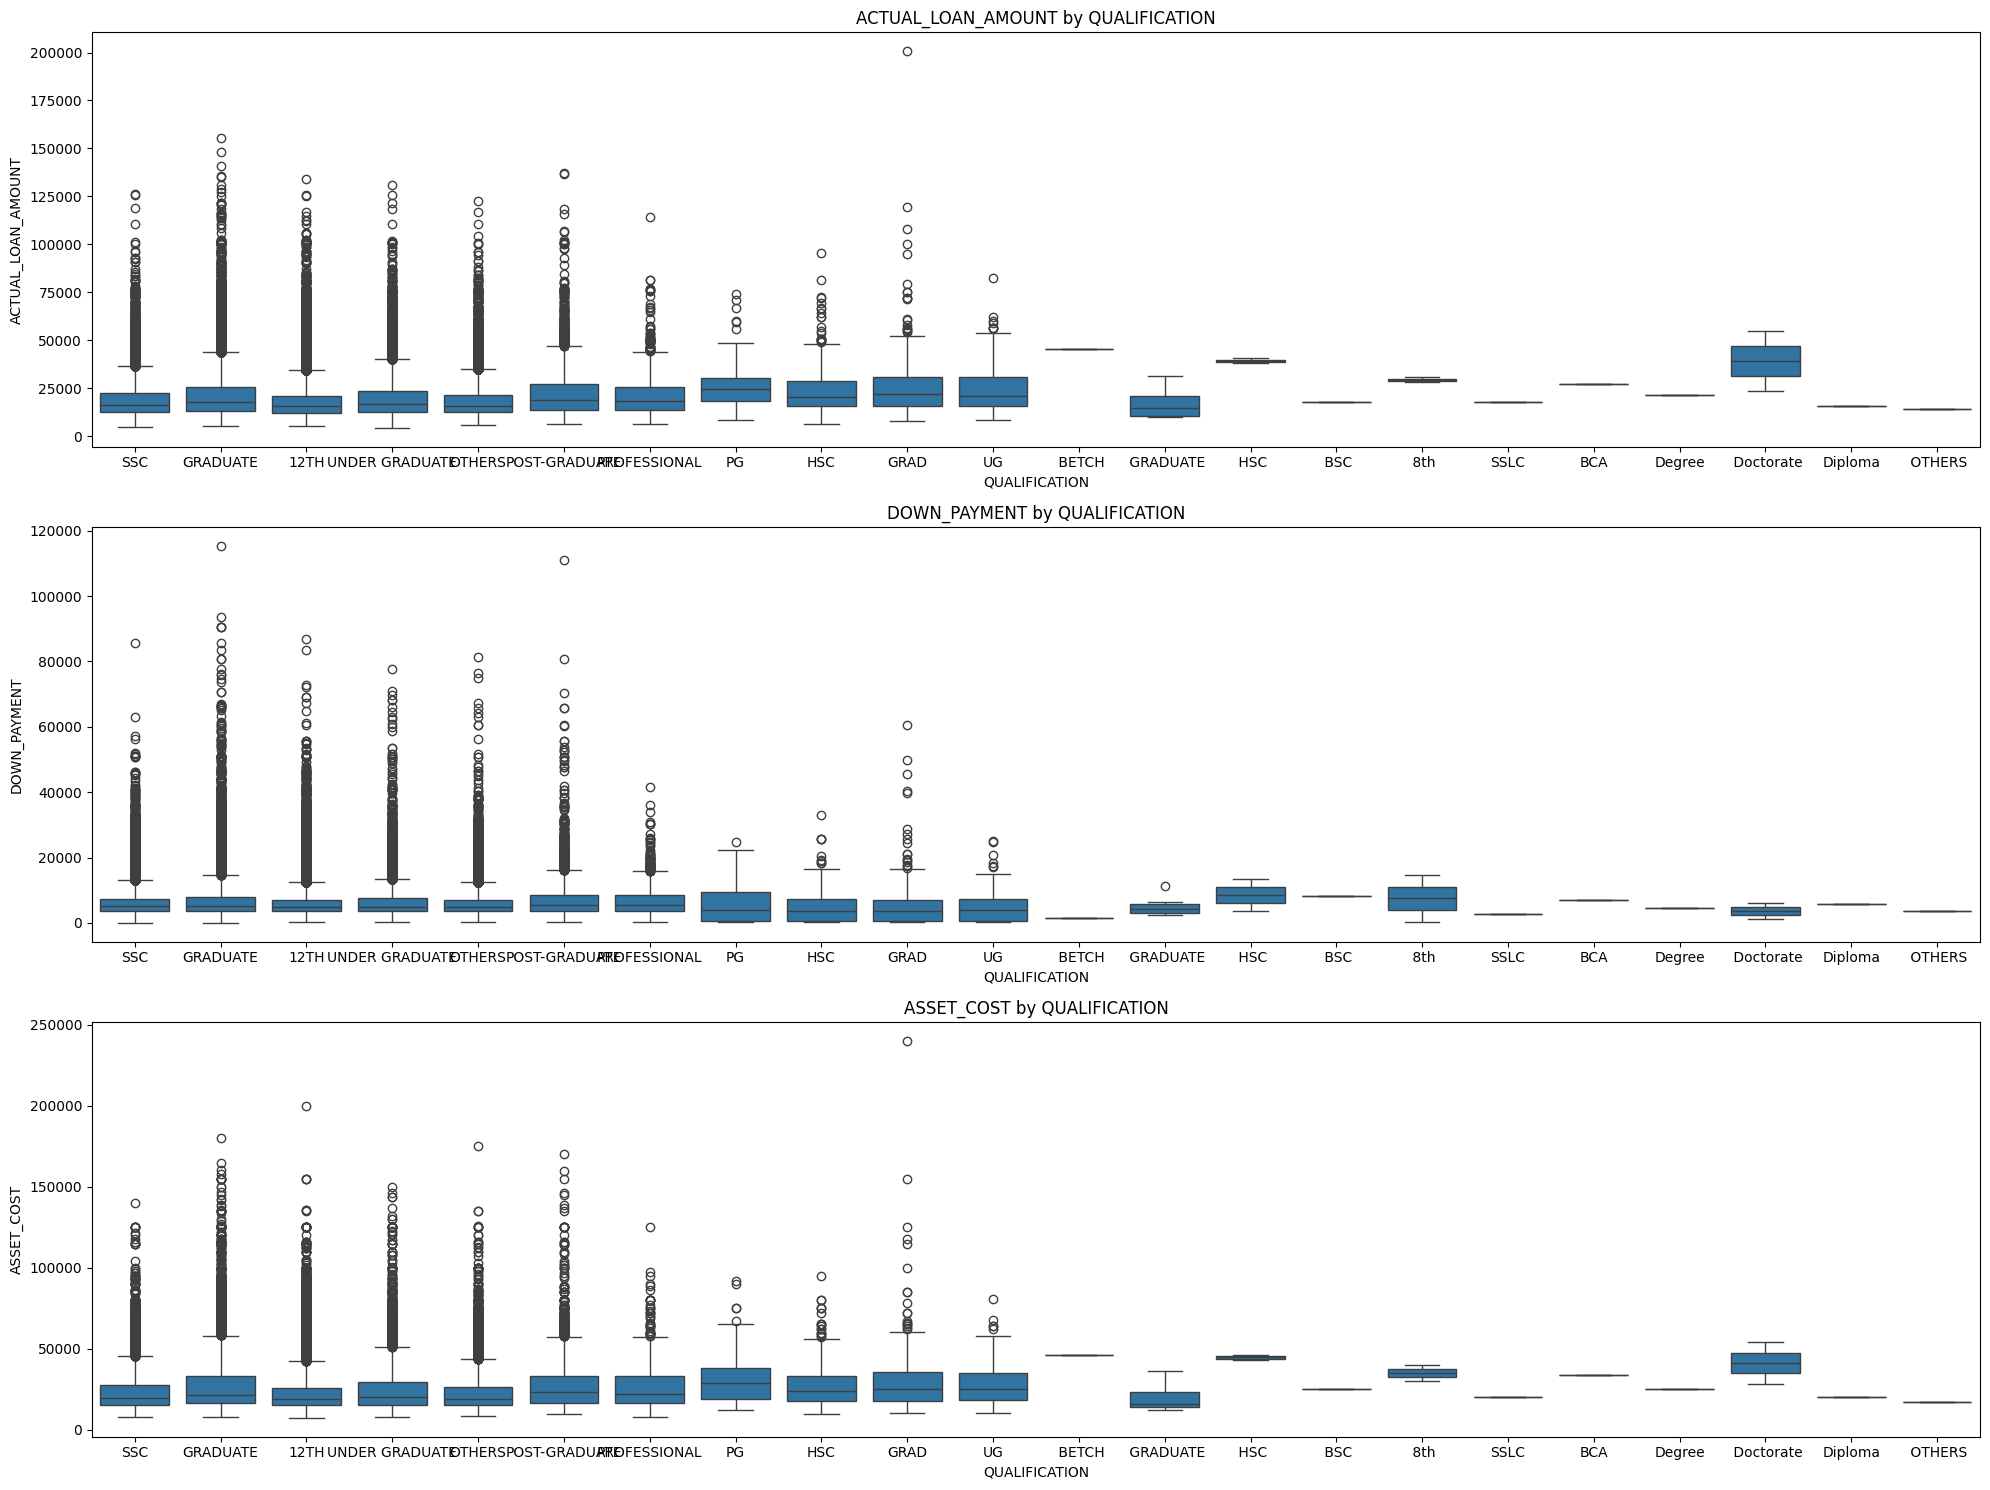

In [ ]:

# Bar charts
plt.figure(figsize=(20, 15))
plt.subplot(3, 1, 1)
sns.barplot(x='QUALIFICATION', y='ACTUAL_LOAN_AMOUNT', data=df, estimator='mean')
plt.title('Average ACTUAL_LOAN_AMOUNT by QUALIFICATION')

plt.subplot(3, 1, 2)
sns.barplot(x='QUALIFICATION', y='DOWN_PAYMENT', data=df, estimator='mean')
plt.title('Average DOWN_PAYMENT by QUALIFICATION')

plt.subplot(3, 1, 3)
sns.barplot(x='QUALIFICATION', y='ASSET_COST', data=df, estimator='mean')
plt.title('Average ASSET_COST by QUALIFICATION')

plt.tight_layout()
plt.show()

# Box plots
plt.figure(figsize=(20, 15))
plt.subplot(3, 1, 1)
sns.boxplot(x='QUALIFICATION', y='ACTUAL_LOAN_AMOUNT', data=df)
plt.title('ACTUAL_LOAN_AMOUNT by QUALIFICATION')

plt.subplot(3, 1, 2)
sns.boxplot(x='QUALIFICATION', y='DOWN_PAYMENT', data=df)
plt.title('DOWN_PAYMENT by QUALIFICATION')

plt.subplot(3, 1, 3)
sns.boxplot(x='QUALIFICATION', y='ASSET_COST', data=df)
plt.title('ASSET_COST by QUALIFICATION')

plt.tight_layout()
plt.show()

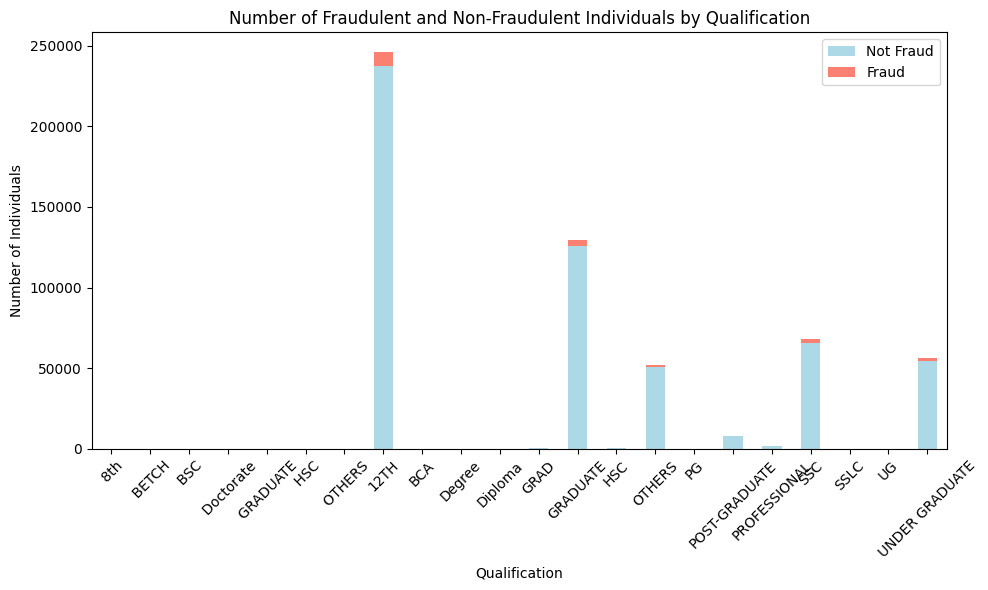

In [ ]:
fraud_counts = df.groupby(['QUALIFICATION', 'TARGET_VARIABLE']).size().unstack(fill_value=0)

# Plotting
fraud_counts.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'], figsize=(10, 6))

# Adding titles and labels
plt.title('Number of Fraudulent and Non-Fraudulent Individuals by Qualification')
plt.xlabel('Qualification')
plt.ylabel('Number of Individuals')
plt.legend(['Not Fraud', 'Fraud'])
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

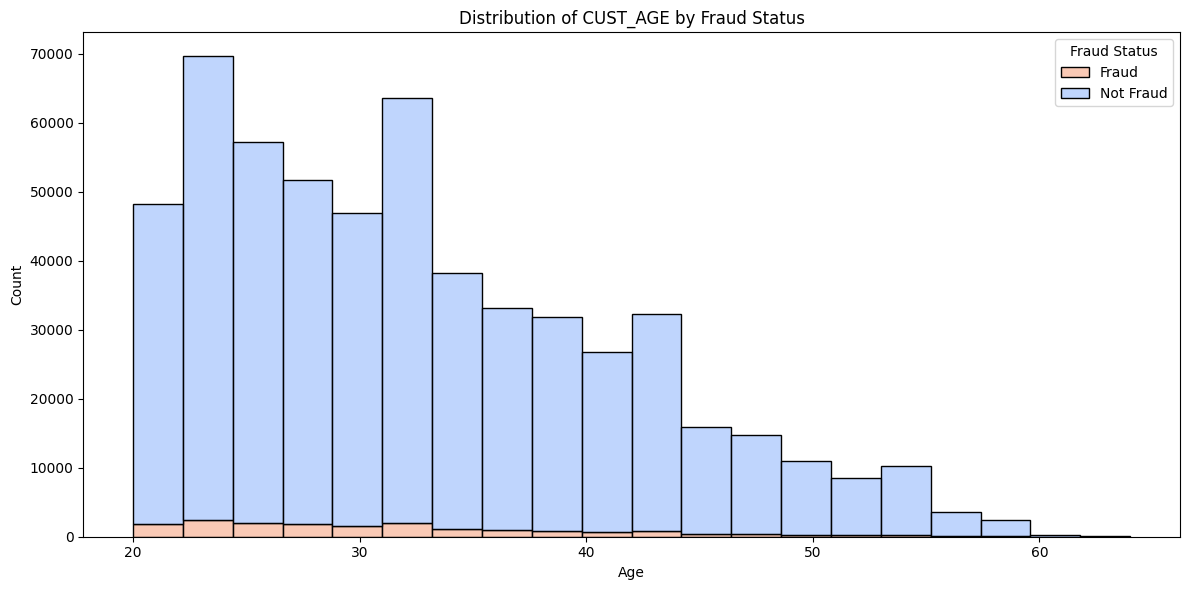

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='CUST_AGE', hue='TARGET_VARIABLE', multiple='stack', bins=20, palette='coolwarm')

# Adding titles and labels
plt.title('Distribution of CUST_AGE by Fraud Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Fraud Status', labels=['Fraud', 'Not Fraud'])

plt.tight_layout()
plt.show()

# Step 5: Feature Encoding (One-Hot Encoding)

In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)
print("\nEncoded DataFrame Preview:\n", df_encoded.head())


Encoded DataFrame Preview:
    DISBMONTH  LOAN_NUMBER  CUST_PINCODE  TENUR  ADVANCE_EMI_COUNT     EMI  \
0 2022-10-31            1      517551.0    7.0                1.0  2490.0   
1 2022-11-30            2      517002.0    6.0                0.0  4350.0   
2 2022-10-31            3      517132.0    8.0                2.0  3825.0   
3 2022-10-31            4      517130.0    7.0                1.0  1942.0   
4 2022-10-31            5      515212.0    7.0                1.0  3372.0   

      LTV  ASSET_COST  ACTUAL_LOAN_AMOUNT  DOWN_PAYMENT  ...  \
0   83.00     17999.0             14939.0        3885.0  ...   
1  100.00     25500.0             26100.0         635.0  ...   
2   74.50     29999.0             22949.0        9023.0  ...   
3   85.05     12990.0             11648.0        3315.0  ...   
4   85.34     22999.0             20227.0        4079.0  ...   

   full_state_name_MAHARASHTRA  full_state_name_ODISHA  \
0                        False                   False   
1      

# Step 6: Data Scaling

In [ ]:
# Drop datetime columns before scaling
datetime_columns = df_encoded.select_dtypes(include=['datetime64']).columns
df_without_datetime = df_encoded.drop(columns=datetime_columns)

In [ ]:
# Initialize the scaler and scale the numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_without_datetime)
df_scaled = pd.DataFrame(scaled_features, columns=df_without_datetime.columns)


In [ ]:
# Combine scaled features with datetime columns
df_final = pd.concat([df_scaled, df_encoded[datetime_columns]], axis=1)
print("\nFinal DataFrame after Scaling:\n", df_final.head())



Final DataFrame after Scaling:
    LOAN_NUMBER  CUST_PINCODE     TENUR  ADVANCE_EMI_COUNT       EMI       LTV  \
0    -1.732048     -0.106283 -0.942559          -0.527228  0.036592  0.474504   
1    -1.732042     -0.109177 -1.313368          -1.202678  1.960103  2.013925   
2    -1.732036     -0.108491 -0.571749           0.148222  1.417176 -0.295207   
3    -1.732029     -0.108502 -0.942559          -0.527228 -0.530120  0.660140   
4    -1.732023     -0.118610 -0.942559          -0.527228  0.948708  0.686401   

   ASSET_COST  ACTUAL_LOAN_AMOUNT  DOWN_PAYMENT  CUST_AGE  ...  \
0   -0.470236           -0.437529     -0.483284  1.626607  ...   
1    0.203108            0.803856     -1.245926  0.716789  ...   
2    0.606971            0.453386      0.722393 -1.216577  ...   
3   -0.919880           -0.803571     -0.617040 -1.216577  ...   
4   -0.021400            0.150630     -0.437760  1.626607  ...   

   full_state_name_ODISHA  full_state_name_PUDUCHERRY  full_state_name_PUNJAB  \
0 

# Step 7: Target Variable and Feature Selection

In [ ]:
# Define the target variable and features
X = df_final.drop(columns=['TARGET_VARIABLE'])  # Adjust with your actual target variable name
y = df_final['TARGET_VARIABLE']

# Step 8: Split the data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nData Split:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


Data Split:
X_train shape: (452881, 179)
X_test shape: (113221, 179)
y_train shape: (452881,)
y_test shape: (113221,)


# Step 9: Handle non-numeric columns in X_train

In [ ]:
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
print("\nNon-numeric columns:", non_numeric_cols)


Non-numeric columns: Index([], dtype='object')


In [ ]:
# Extract year, month, and day as features from datetime columns
X_train['DISBMONTH_year'] = X_train['DISBMONTH'].dt.year
X_train['DISBMONTH_month'] = X_train['DISBMONTH'].dt.month
X_train['DISBMONTH_day'] = X_train['DISBMONTH'].dt.day

X_test['DISBMONTH_year'] = X_test['DISBMONTH'].dt.year
X_test['DISBMONTH_month'] = X_test['DISBMONTH'].dt.month
X_test['DISBMONTH_day'] = X_test['DISBMONTH'].dt.day

In [ ]:

# Drop the original 'DISBMONTH' column if no longer needed
X_train = X_train.drop(columns=['DISBMONTH'])
X_test = X_test.drop(columns=['DISBMONTH'])


# Step 10: Scale Numeric Features

In [ ]:
numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

# Step 11: Encode Categorical Features

In [ ]:
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
X_train_categorical_encoded = encoder.fit_transform(X_train[non_numeric_cols])
X_test_categorical_encoded = encoder.transform(X_test[non_numeric_cols])

X_train_categorical_encoded = pd.DataFrame(X_train_categorical_encoded, columns=encoder.get_feature_names_out(), index=X_train.index)
X_test_categorical_encoded = pd.DataFrame(X_test_categorical_encoded, columns=encoder.get_feature_names_out(), index=X_test.index)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Combine numeric and categorical features
X_train_processed = pd.concat([X_train[numeric_columns], X_train_categorical_encoded], axis=1)
X_test_processed = pd.concat([X_test[numeric_columns], X_test_categorical_encoded], axis=1)


# Step 12: Model Training

In [ ]:
# Convert y_train to discrete values if it's continuous
# For example, if it's a binary classification problem:
y_train_discrete = (y_train > 0).astype(int)

# Now, use y_train_discrete in the model fitting
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}
model_performance = {}
for name, model in models.items():
    model.fit(X_train_processed, y_train_discrete) # Use the discrete target
    y_pred = model.predict(X_test_processed)
    # Convert y_test to discrete values for consistency with y_pred
    y_test_discrete = (y_test > 0).astype(int) # Apply the same thresholding to y_test
    accuracy = accuracy_score(y_test_discrete, y_pred) # Compare discrete values
    model_performance[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.9679
Random Forest Accuracy: 0.9682
Gradient Boosting Accuracy: 0.9679
K-Nearest Neighbors Accuracy: 0.9673


# Removing some unnecessary Feature's

In [ ]:
# Remove unnecessary columns (like high missing values or irrelevant features)
columns_to_drop = ['LOAN_NUMBER', 'MANUFACTURE_CODE', 'CUST_STATE','GENDER']
df = df.drop(columns=columns_to_drop)

# Step 17: Feature Importance (Optional)*italicized text*

In [ ]:
model = RandomForestRegressor()  # Use RandomForestRegressor for continuous targets
model.fit(X_train_processed, y_train)

importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train_processed.columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("\nTop 10 Important Features:\n", importance_df.head(10))



Top 10 Important Features:
                      Feature  Importance
0               CUST_PINCODE    0.120599
3                        EMI    0.077609
7               DOWN_PAYMENT    0.073965
8                   CUST_AGE    0.073673
6         ACTUAL_LOAN_AMOUNT    0.067862
4                        LTV    0.054368
5                 ASSET_COST    0.045575
9                MATCH_SCORE    0.039904
34              BUREAU_SCORE    0.031858
11  BUREAU_VINTAGE_IN_MONTHS    0.030265


# spliting the data again after feature extraction

In [ ]:
# Define target variable and features
X = df.drop(columns=['TARGET_VARIABLE'])  # Replace with actual target column
y = df['TARGET_VARIABLE']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Extract date features from 'DISBMONTH'
X_train['DISBMONTH'] = pd.to_datetime(X_train['DISBMONTH'], errors='coerce')
X_test['DISBMONTH'] = pd.to_datetime(X_test['DISBMONTH'], errors='coerce')
X_train['DISBMONTH_year'] = X_train['DISBMONTH'].dt.year
X_train['DISBMONTH_month'] = X_train['DISBMONTH'].dt.month
X_train['DISBMONTH_day'] = X_train['DISBMONTH'].dt.day
X_test['DISBMONTH_year'] = X_test['DISBMONTH'].dt.year
X_test['DISBMONTH_month'] = X_test['DISBMONTH'].dt.month
X_test['DISBMONTH_day'] = X_test['DISBMONTH'].dt.day

# Drop original 'DISBMONTH' column
X_train = X_train.drop(columns=['DISBMONTH'])
X_test = X_test.drop(columns=['DISBMONTH'])

# Separate numeric and categorical features
numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = X_train.select_dtypes(include=['object']).columns

X_train_numeric = X_train[numeric_columns]
X_test_numeric = X_test[numeric_columns]
X_train_categorical = X_train[categorical_columns]
X_test_categorical = X_test[categorical_columns]

# Scale numeric features
scaler = StandardScaler()
X_train_numeric_scaled = scaler.fit_transform(X_train_numeric)
X_test_numeric_scaled = scaler.transform(X_test_numeric)

# One-hot encode categorical features
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
X_train_categorical_encoded = encoder.fit_transform(X_train_categorical)
X_test_categorical_encoded = encoder.transform(X_test_categorical)

# Convert scaled and encoded features back to DataFrame
X_train_numeric_scaled = pd.DataFrame(X_train_numeric_scaled, columns=numeric_columns, index=X_train.index)
X_test_numeric_scaled = pd.DataFrame(X_test_numeric_scaled, columns=numeric_columns, index=X_test.index)
X_train_categorical_encoded = pd.DataFrame(X_train_categorical_encoded, columns=encoder.get_feature_names_out(), index=X_train.index)
X_test_categorical_encoded = pd.DataFrame(X_test_categorical_encoded, columns=encoder.get_feature_names_out(), index=X_test.index)

# Combine scaled numeric and encoded categorical features
X_train_processed = pd.concat([X_train_numeric_scaled, X_train_categorical_encoded], axis=1)
X_test_processed = pd.concat([X_test_numeric_scaled, X_test_categorical_encoded], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [1, 3, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


# Step 14: Additional EDA (Optional)

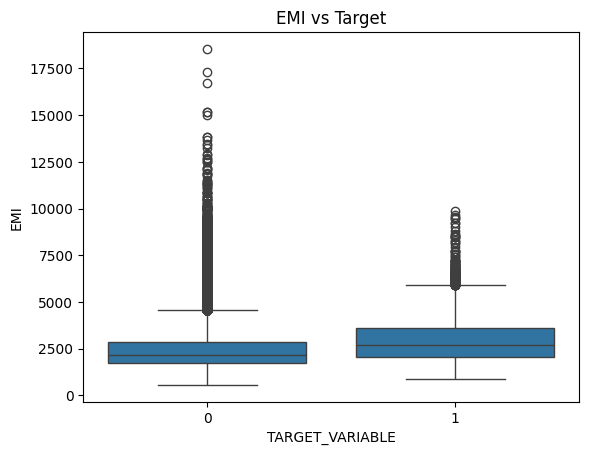

In [ ]:
sns.boxplot(x='TARGET_VARIABLE', y='EMI', data=df)
plt.title('EMI vs Target')
plt.show()


# Step 15: Convert Continuous Target to Binary (If needed)

In [ ]:
threshold = 0.5  # Example threshold, adjust based on your data
y_train_discrete = np.where(y_train > threshold, 1, 0)
y_test_discrete = np.where(y_test > threshold, 1, 0)

# Step 16: Train and Evaluate Models with Discrete Target (If needed)

In [ ]:
model_performance = {}
for name, model in models.items():
    model.fit(X_train_processed, y_train_discrete)
    y_pred = model.predict(X_test_processed)
    accuracy = accuracy_score(y_test_discrete, y_pred)
    model_performance[name] = accuracy
    print(f"{name} Accuracy (Discrete Target): {accuracy:.4f}")

Logistic Regression Accuracy (Discrete Target): 0.9678
Random Forest Accuracy (Discrete Target): 0.9681
Gradient Boosting Accuracy (Discrete Target): 0.9679


KeyboardInterrupt: 